# Bài ôn tập buổi 7: 
# Bài 1: international-airline-passengers
- Cung cấp tập tin international-airline-passengers.csv (the number of international-airline-passengers (in thousands , from 1949-01 to 1960-12)
- Đọc dữ liệu từ tập tin, in dữ liệu
- Chuyển dữ liệu này thành Time Series object => in Time Series object
- Vẽ Time Series object vừa tạo. Nhận xét.
- Thực hiện việc dự báo và vẽ biểu đồ so sánh với thực tiễn
- Dự đoán số lượng hành khách cho 12 tháng tiếp theo

In [1]:
data <- read.csv('Cung cap du lieu buoi 8/international-airline-passengers.csv',row='Month')

In [2]:
head(data)

,passengers_in_thousands
,<int>
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135


In [3]:
data.timeseries <- ts(data, start=c(1949,1), frequency=12)
print(data.timeseries)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432


null device 
          1

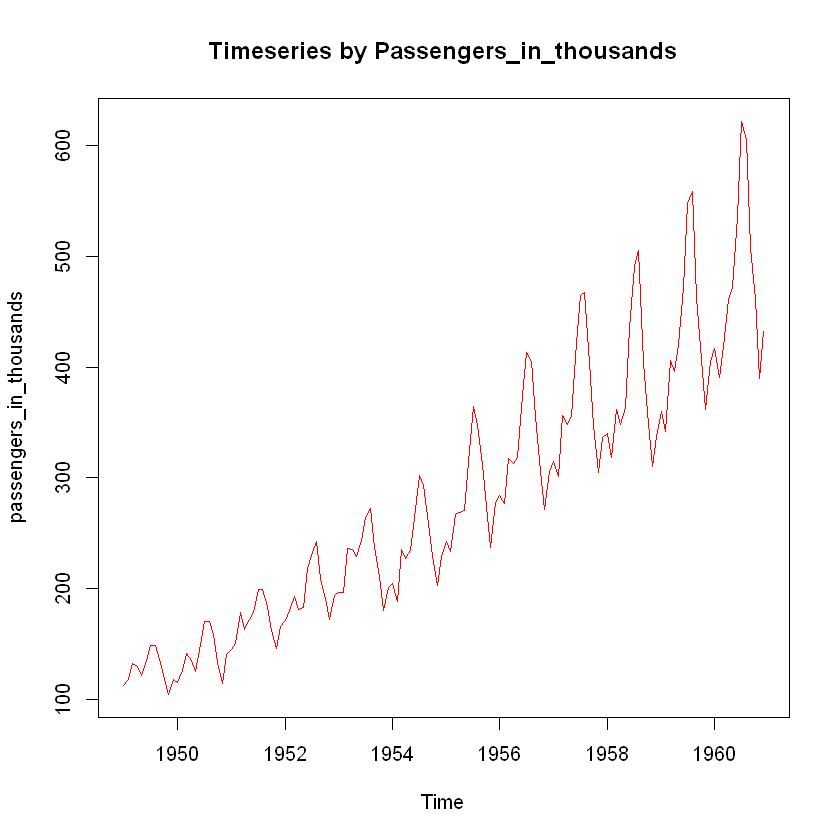

In [4]:
plot(data.timeseries, main='Timeseries by Passengers_in_thousands',
    col='red', xlab='Time', ylab='passengers_in_thousands')
dev.off()

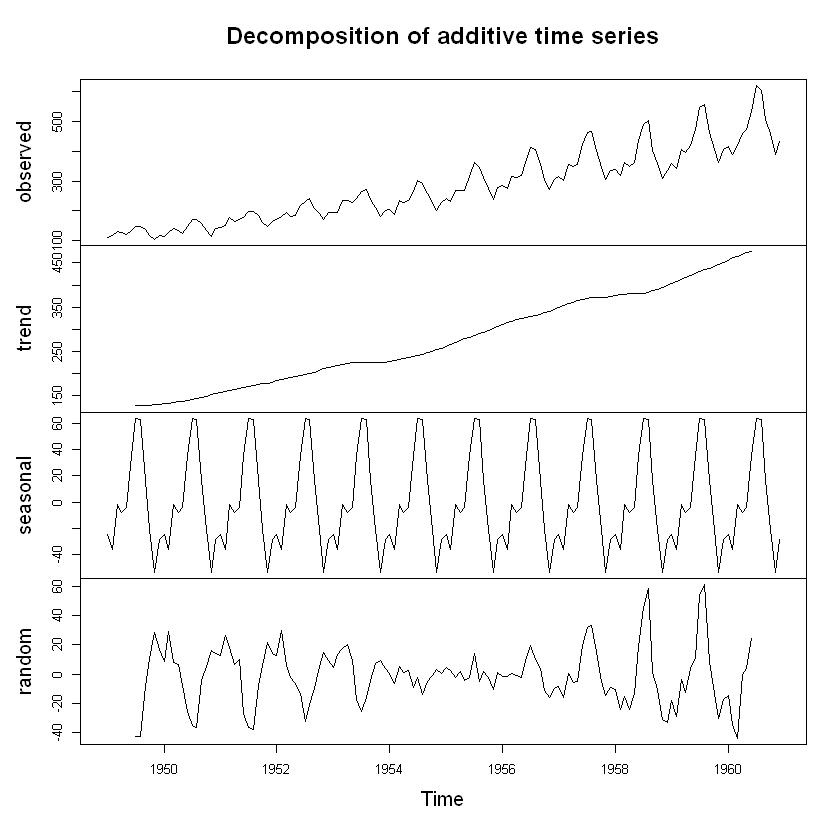

In [5]:
comp <- decompose(data.timeseries)
plot(comp)

- Qua 'Trend' Số luong Passengers ngay cang tang theo năm, trend giảm 1953, tăng mạnh từ năm 1959
- Số lượng Passengers chịu ảnh hưởng khá đều theo tháng (Seasonal)
- Random: Tỷ lệ tăng không đều, từ 1950->1953 tăng mạnh ổn định, 1954->1958 trend bị giảm, 
sau đó tăng mạnh từ 1959

In [6]:
library('forecast')

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [21]:
# forecasting
data.timeseries.forecasts <- HoltWinters(data.timeseries)
print(data.timeseries.forecasts)

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = data.timeseries)

Smoothing parameters:
 alpha: 0.2479595
 beta : 0.03453373
 gamma: 1

Coefficients:
          [,1]
a   477.827781
b     3.127627
s1  -27.457685
s2  -54.692464
s3  -20.174608
s4   12.919120
s5   18.873607
s6   75.294426
s7  152.888368
s8  134.613464
s9   33.778349
s10 -18.379060
s11 -87.772408
s12 -45.827781


- alpha = 24% khá thấp, cho thấy giá trị hiện tại không phụ thuộc vào các giá trị gần đây và các giá trị quá khứ gần
- beta = 3% rất thấp, độ dốc của trend không cập nhật trong thời gian qua
- gamma = 1: ảnh hưởng của yếu tố mùa tại thời điểm hiện tại rất phụ thuộc vào các giá trị gần.

null device 
          1

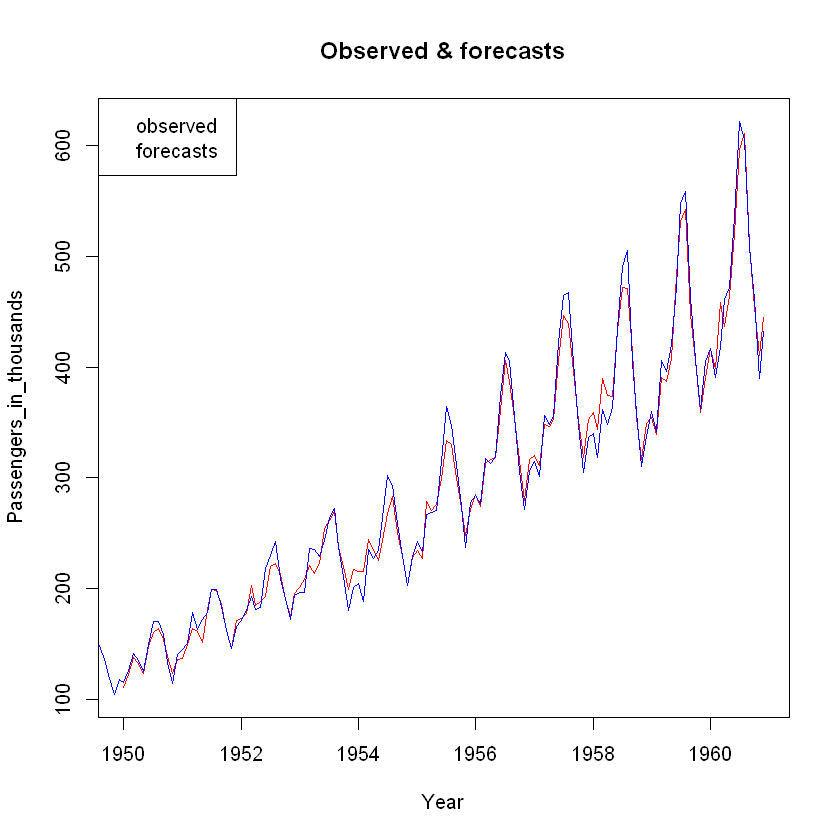

In [8]:
plot(data.timeseries.forecasts, main='Observed & forecasts',
    xlab='Year', ylab='Passengers_in_thousands',col=c('blue','red'))
legend("topleft",legend=c('observed','forecasts'), col=c('blue','red'))
dev.off()

- Kết quả dự báo khá gần quan sát

In [9]:
data.timeseries.forecasts_new <- forecast:::forecast.HoltWinters(data.timeseries.forecasts, h=12)

In [10]:
data.timeseries.forecasts_new

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       453.4977 437.0972 469.8983 428.4153 478.5802
Feb 1961       429.3906 412.4590 446.3221 403.4960 455.2851
Mar 1961       467.0361 449.5553 484.5169 440.3015 493.7706
Apr 1961       503.2574 485.2097 521.3051 475.6558 530.8590
May 1961       512.3395 493.7078 530.9713 483.8447 540.8343
Jun 1961       571.8880 552.6556 591.1204 542.4746 601.3014
Jul 1961       652.6095 632.7605 672.4586 622.2530 682.9661
Aug 1961       637.4623 616.9809 657.9436 606.1387 668.7858
Sep 1961       539.7548 518.6260 560.8835 507.4412 572.0684
Oct 1961       490.7250 468.9342 512.5158 457.3988 524.0511
Nov 1961       424.4593 401.9922 446.9264 390.0988 458.8197
Dec 1961       469.5315 446.3742 492.6888 434.1155 504.9475

null device 
          1

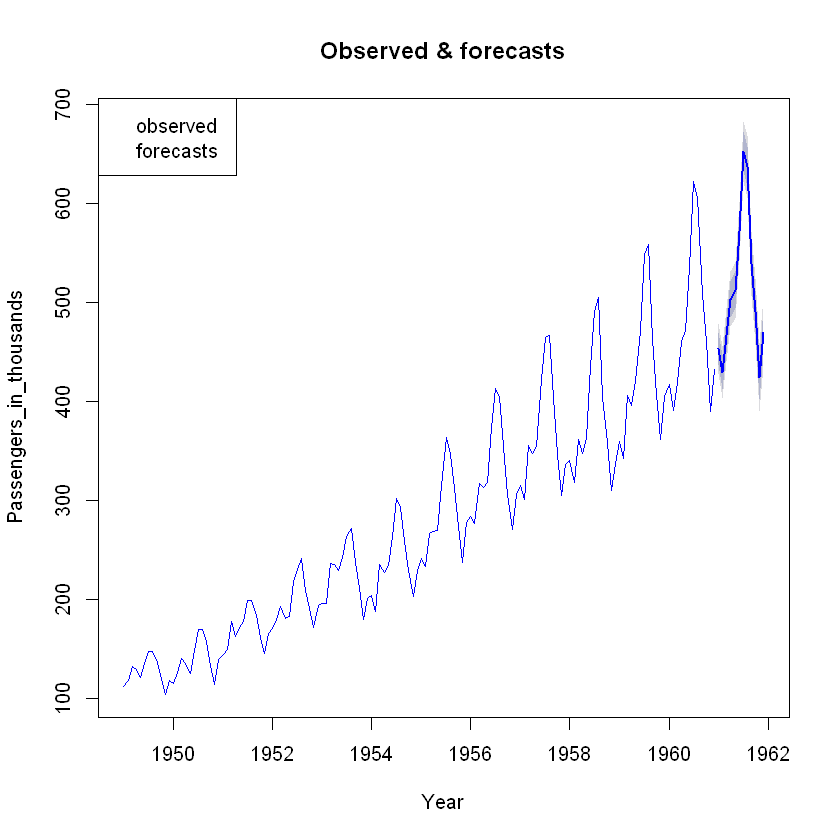

In [19]:
plot(data.timeseries.forecasts_new, main='Observed & forecasts',
    xlab='Year', ylab='Passengers_in_thousands',col=c('blue','red'))
legend("topleft",legend=c('observed','forecasts'), col=c('blue','red'))
dev.off()

Dự đoán gần với thực tế

## Bài 2:
#### Sinh viên nam tại một trường đại học X ở Việt Nam có chiều cao trung bình là 164cm. Các chiều cao thường được phân phối, với độ lệch chuẩn là 6cm. Cho biết giá trị ở phân vị thứ [99] của data normal.
- Chọn loại phân phối. Hãy tạo ra 1000 mẫu ngẫu nhiên theo mô tả trên
- Vẽ histogram quan sát. 
- Cho biết giá trị ở phân vị thứ [99] của bộ mẫu.
- Nếu chiều cao của SV nam là 174cm thì xác suất là bao nhiêu?
- Cho biết tỷ lệ sinh viên nam cao từ 174cm trở lên.

In [12]:
# Choosed Normal Distribution
sample <- rnorm(1000,mean=164,sd=6)

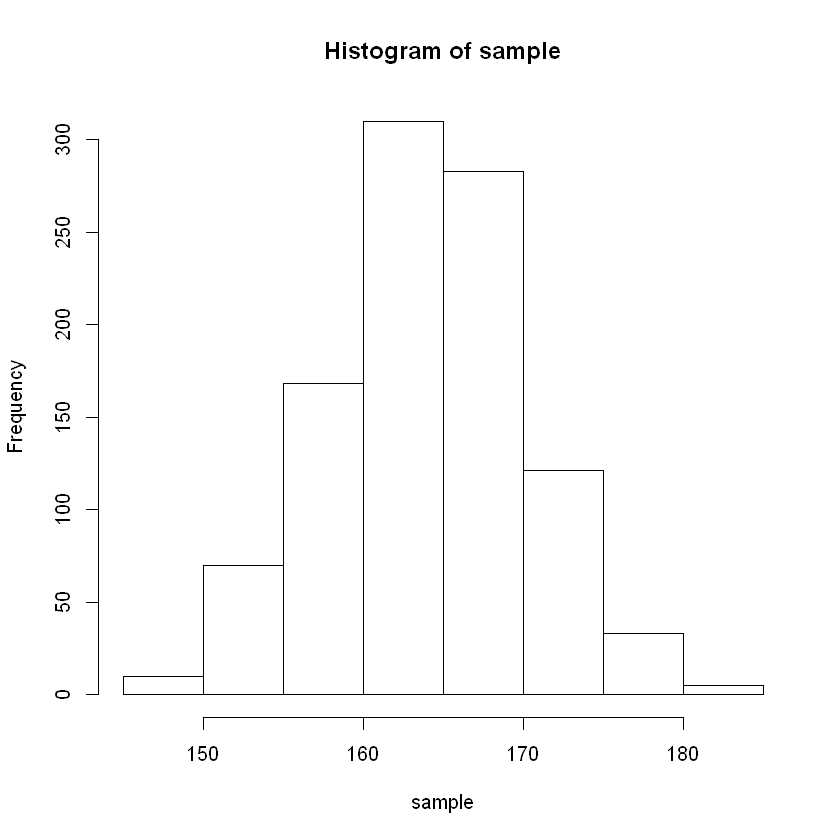

In [13]:
hist(sample)

In [14]:
print(paste('Value in percentile 99: ',quantile(sample,0.99)))

[1] "Value in percentile 99:  178.417232179264"


In [15]:
print(paste('Chiều cao của SV nam là 174cm thì xác suất: ',dnorm(174, 164,6))) # Probability

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "Chi<U+1EC1>u cao c<U+1EE7>a SV nam là 174cm thì xác su<U+1EA5>t:  0.0165795231321248"


In [16]:

p_up_174 <- pnorm(174, 164, 6, lower.tail=FALSE)
print(paste('Tỷ lệ sinh viên nam cao từ 174cm trở lên.', p_up_174))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "T<U+1EF7> l<U+1EC7> sinh viên nam cao t<U+1EEB> 174cm tr<U+1EDF> lên. 0.0477903522728147"
